# Template Matching

## Importing the required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Analysis Image

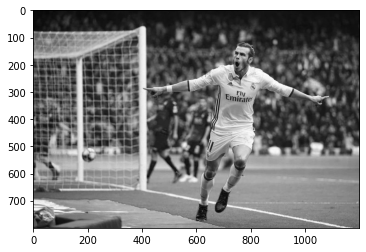

In [15]:
img=cv2.imread("/home/nilotpal/Documents/full_size_20170324004502_2.jpg")
plt.imshow(img[:,:,1],cmap="gray")
img2=img.copy()

## Query Image

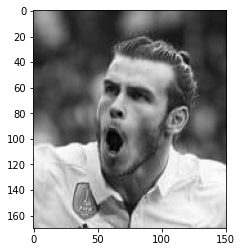

In [8]:
query=cv2.imread("/home/nilotpal/Documents/IMG_20210311_130609.jpg")
plt.imshow(query[:,:,1],cmap="gray")

### Considering the shape of the query image

In [12]:
height_query,width_query,channel_query=query.shape

### Mainly there are Six Methods for template Matching :
#### 1.cv2.TM_CCOEFF
#### 2.cv2.TM_CCOEFF_NORMED
#### 3.cv2.TM_CCORR
#### 4.cv2.TM_CCORR_NORMED
#### 5.cv2.TM_SQDIFF
#### 6.cv2.TM_SQDIFF_NORMED

Now ,I am going to use these one by one in a for loop and will try to get the results :

# Template Matching Methods Basically Stored in a List

In [13]:
### the above mentioned six different methods which we will use for template matching
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


# Code

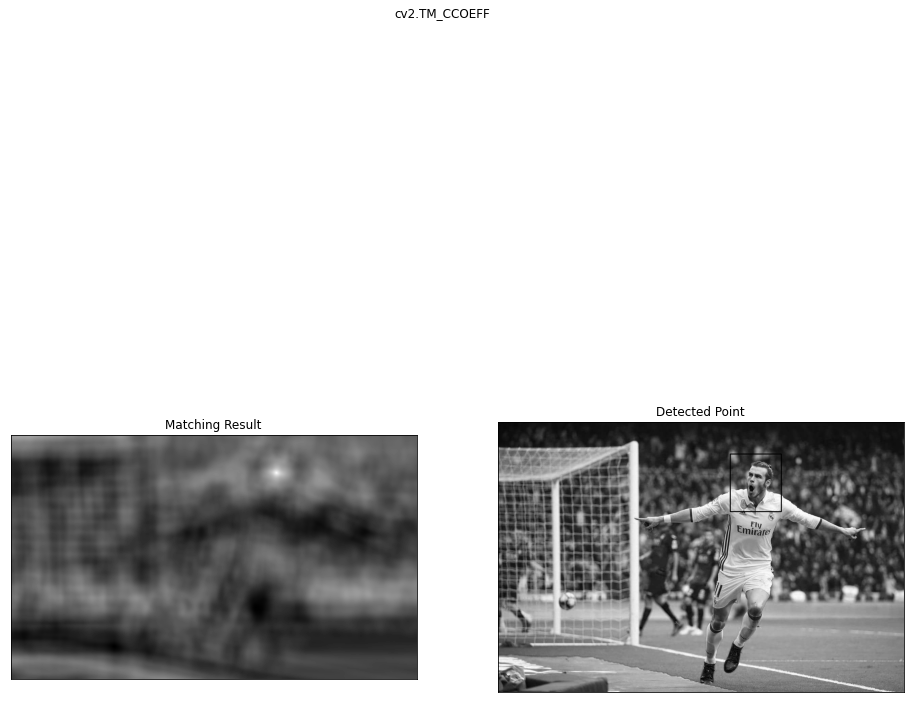

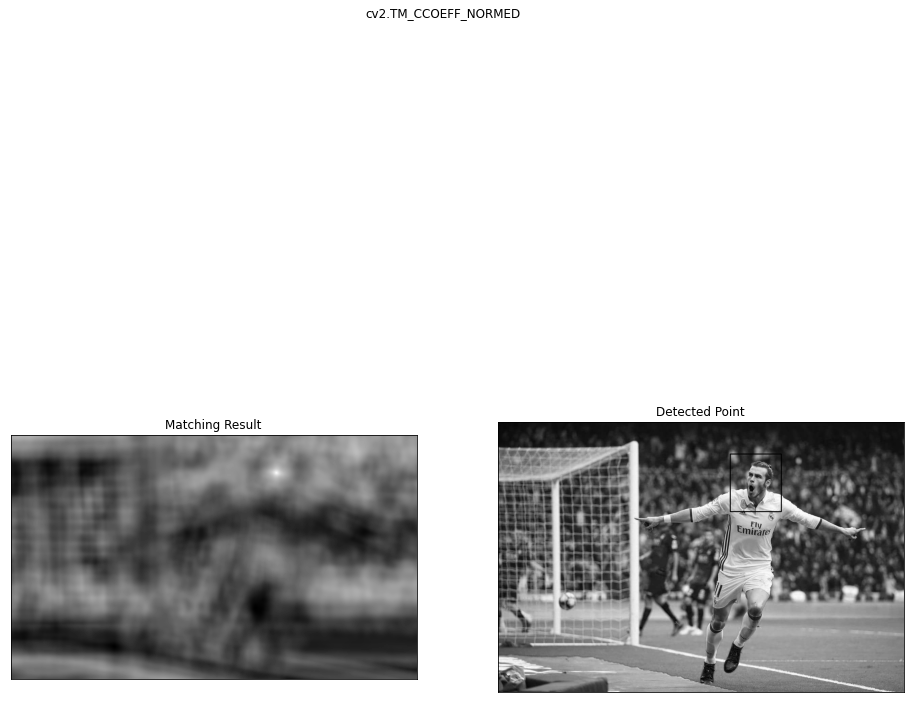

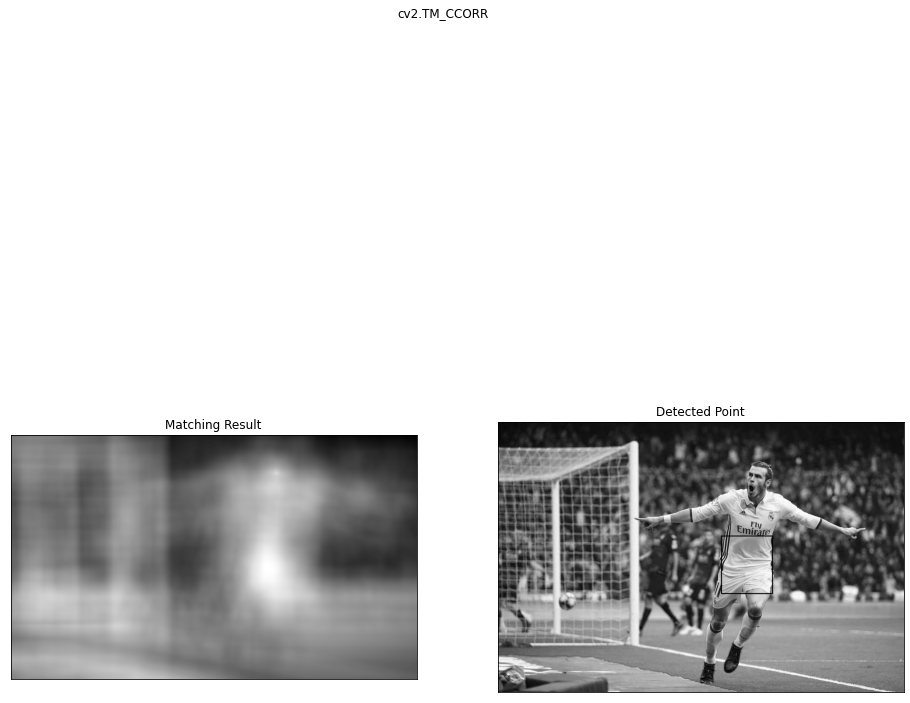

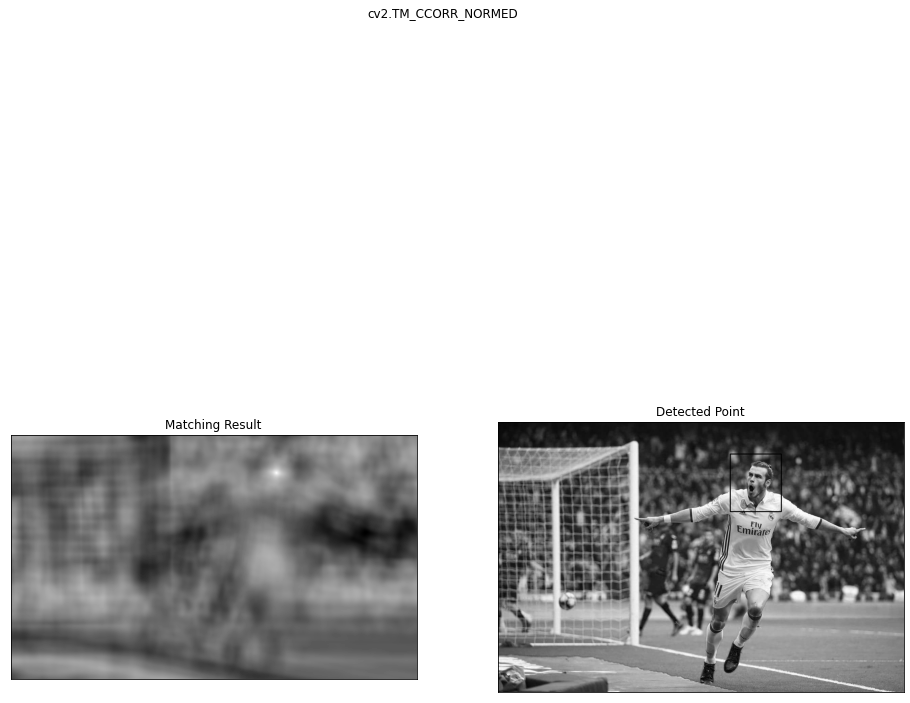

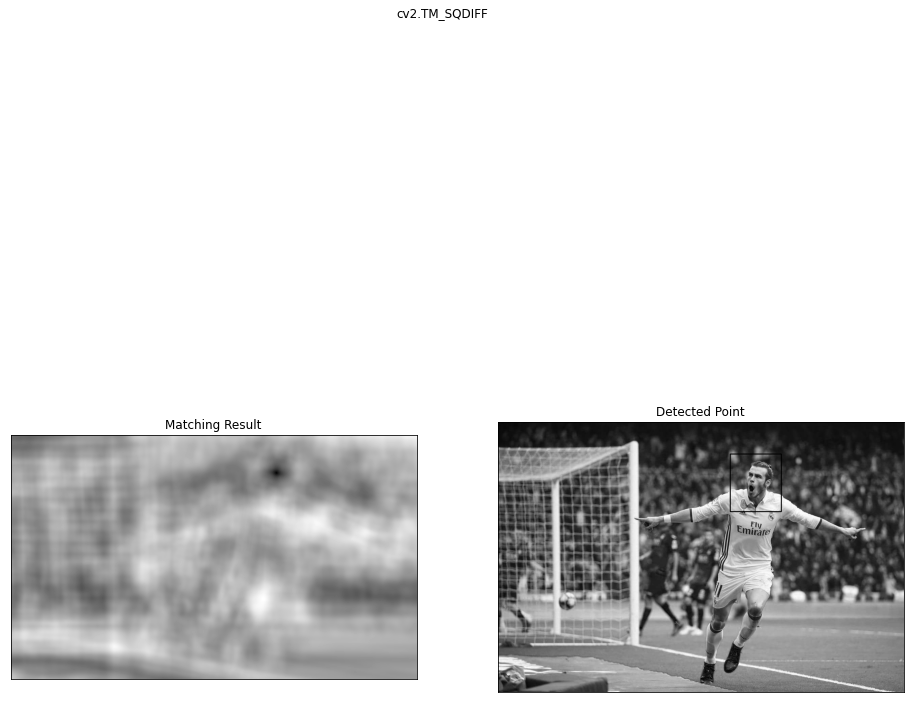

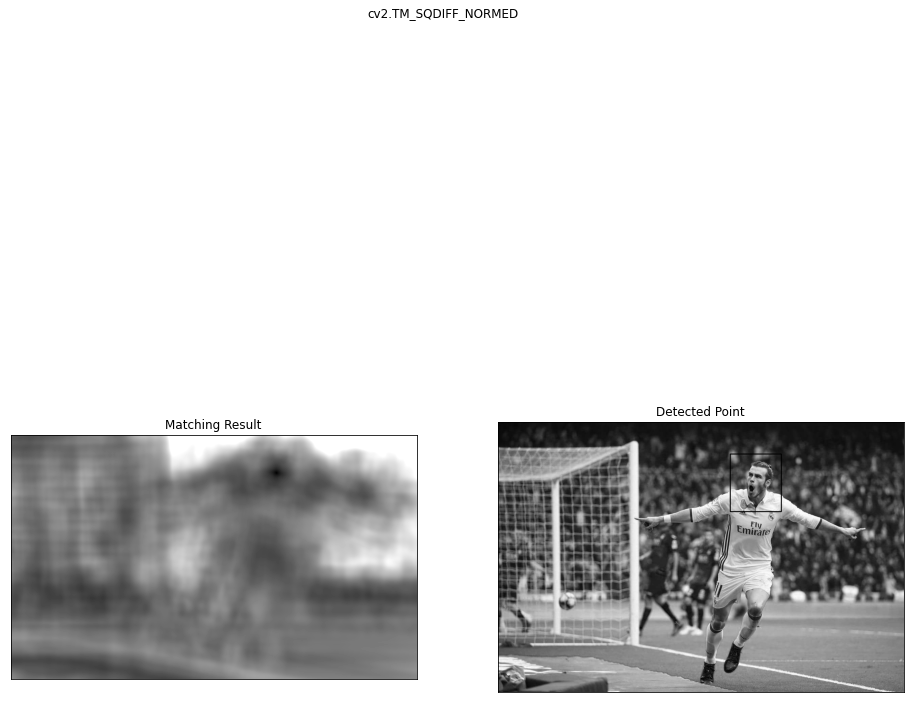

In [24]:
### we will run all the methods in the for loop
for meth in methods:
    img=img2.copy()
    method=eval(meth)
    
    res=cv2.matchTemplate(img,query,method)
    #### Areas with maximum match and minmum match loc and values are stored here
    min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
    ### this required to be done because in cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED the max match areas are dark
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc
    ### Now that we have identified the pixel points with the high matching we will basically draw a rectangle for annotation process
    bottom_right=(top_left[0]+width_query,top_left[1]+height_query)
    ### cv2.rectangle uses start point , end point color and linetype
    cv2.rectangle(img,top_left,bottom_right,(255,0,0),2)
    
    #### basically plotting the results
    plt.figure(figsize=(16,16))
    plt.subplot(121)
    plt.imshow(res,cmap="gray")
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img[:,:,1],cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)